In [1]:
import pandas as pd
#from fancyimpute import BiScaler 
import missingno as msno # visualzing missing valueimport pandas as pd
import numpy as np
import multiprocessing as mp # for speeding up some process
import os
import gc
import time


In [2]:
#---------------------------------------------
# Step1: preprocessing for MICE
#---------------------------------------------

df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
no_need_to_inpute = ['SK_ID_CURR','index']
df.drop(no_need_to_inpute, axis = 1, inplace = True)
# handling with infinity
df.replace([np.inf, -np.inf], np.nan, inplace = True)
print ('The shape of DataFrame needed to complete : ',df.shape)


The shape of DataFrame needed to complete :  (356251, 218)


# BiScaler: Iterative estimation of row/column means and standard deviations to 
# get doubly normalized matrix. Not guaranteed to converge but works well in practice.

In [15]:
from fancyimpute import BiScaler 

X_missing = df.sample(n = 500).copy()

#-------------------
# core algorithm: input should be array
#-------------------
X_filled = BiScaler().fit_transform(X_missing.values)


[BiScaler] Initial log residual value = 45.697620
[BiScaler] Iter 1: log residual = 5.786097, log improvement ratio=39.911523
[BiScaler] Iter 2: log residual = 4.056853, log improvement ratio=1.729244
[BiScaler] Iter 3: log residual = 2.492823, log improvement ratio=1.564029
[BiScaler] Iter 4: log residual = 1.461835, log improvement ratio=1.030988
[BiScaler] Iter 5: log residual = 0.677859, log improvement ratio=0.783977
[BiScaler] Iter 6: log residual = -0.107519, log improvement ratio=0.785377
[BiScaler] Iter 7: log residual = -0.839561, log improvement ratio=0.732042
[BiScaler] Iter 8: log residual = -1.387305, log improvement ratio=0.547744
[BiScaler] Iter 9: log residual = -1.732747, log improvement ratio=0.345443
[BiScaler] Iter 10: log residual = -1.947581, log improvement ratio=0.214834
[BiScaler] Iter 11: log residual = -2.092879, log improvement ratio=0.145298
[BiScaler] Iter 12: log residual = -2.199562, log improvement ratio=0.106683
[BiScaler] Iter 13: log residual = -2.2

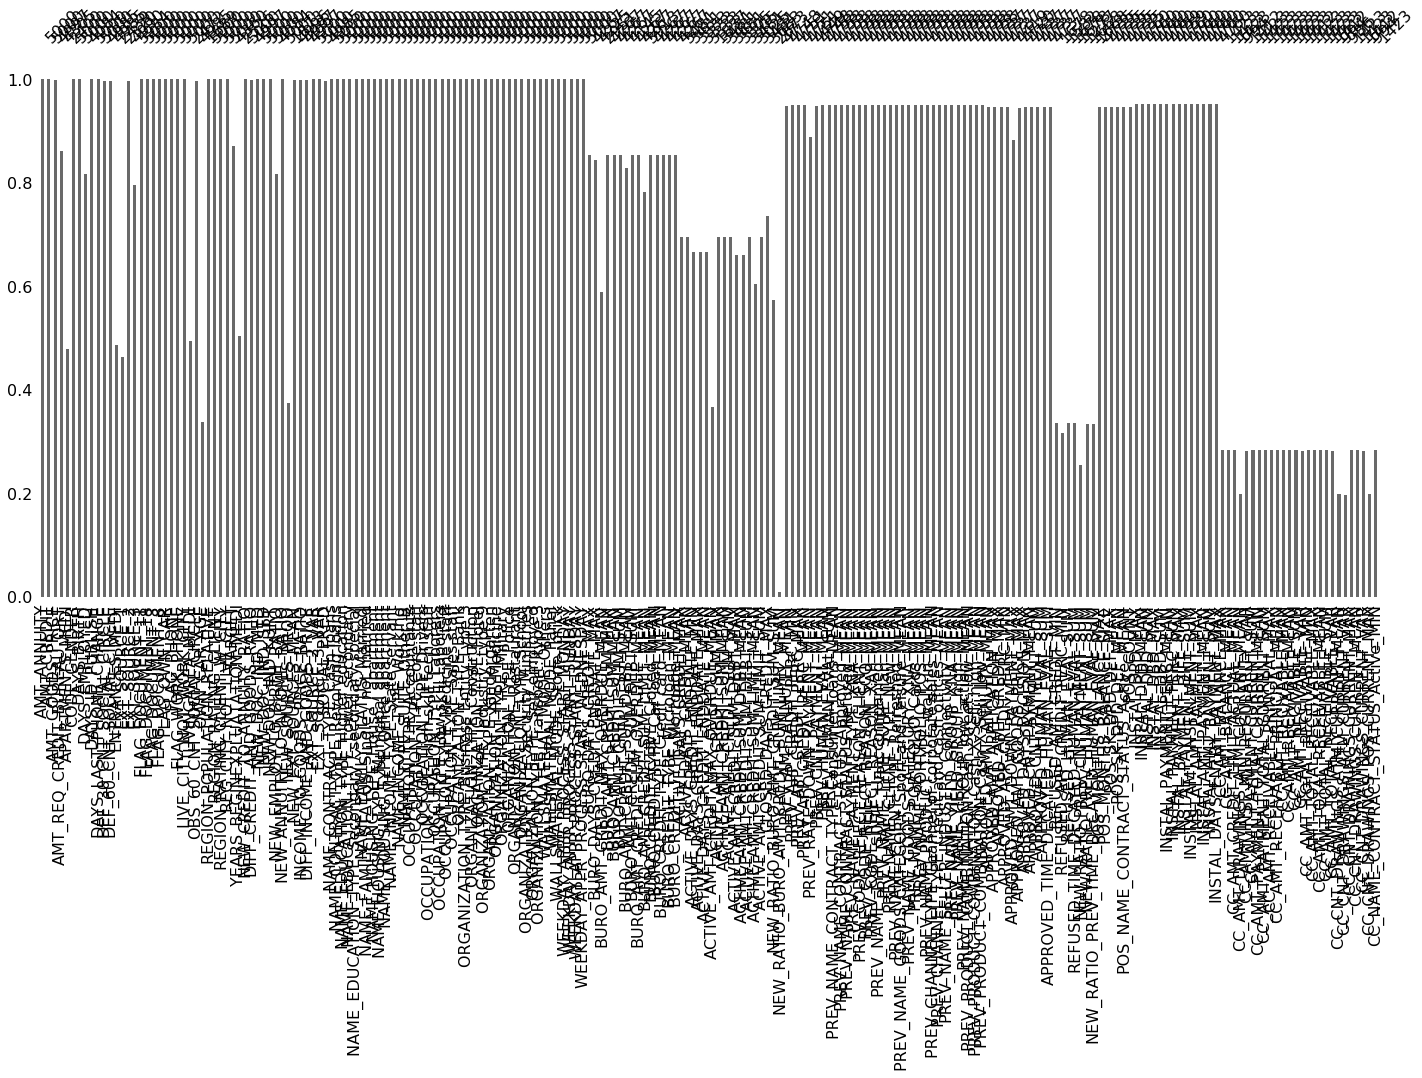

In [11]:
msno.bar(X_missing)

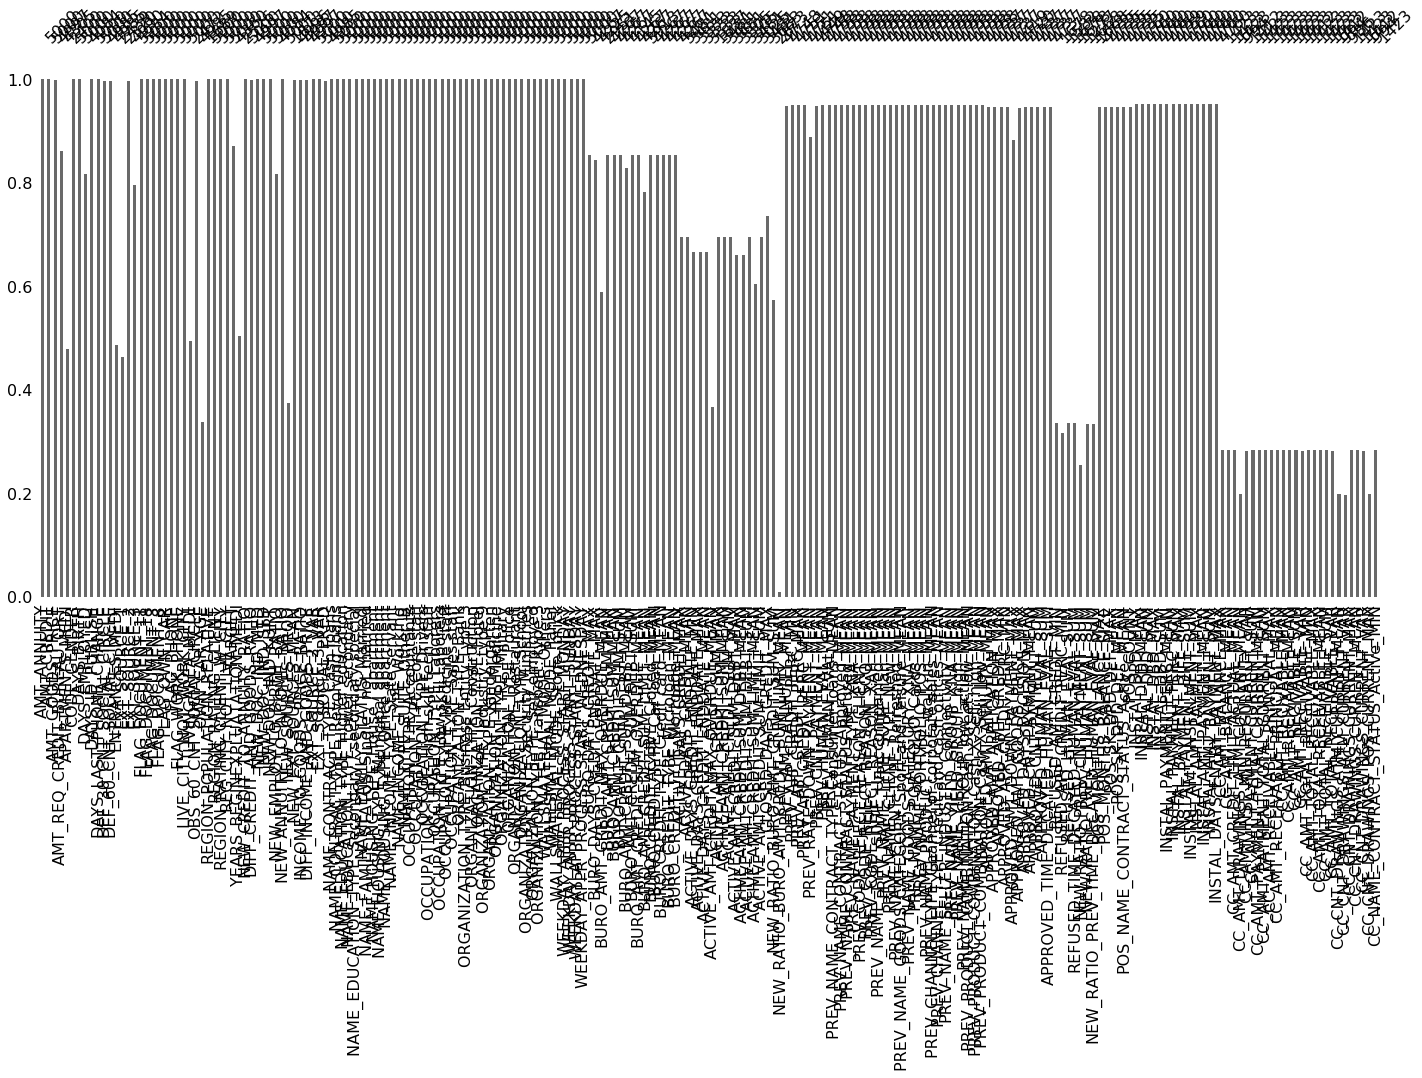

In [13]:
X_filled = pd.DataFrame(X_filled, columns = X_missing.columns)
msno.bar(X_filled)

# SoftImpute
### Spectral Regularization Algorithms for Learning Large Incomplete Matrices

### convergence_threshold: 參數越小, 會花越多時間去收斂。

In [21]:
from fancyimpute import SoftImpute

In [51]:
df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
no_need_to_inpute = ['SK_ID_CURR','index']
df.drop(no_need_to_inpute, axis = 1, inplace = True)
# handling with infinity
df.replace([np.inf, -np.inf], np.nan, inplace = True)
print ('The shape of DataFrame needed to complete : ',df.shape)


The shape of DataFrame needed to complete :  (356251, 218)


In [52]:
df

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,APARTMENTS_MEDI,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,...,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_AMT_TOTAL_RECEIVABLE_SUM,CC_AMT_TOTAL_RECEIVABLE_VAR,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MAX,CC_NAME_CONTRACT_STATUS_Active_MIN
0,24700.5,406597.5,351000.0,0.0,0.0250,0,-9461,-637.0,-2120,-1134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35698.5,1293502.5,1129500.0,0.0,0.0968,1,-16765,-1188.0,-291,-828.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6750.0,135000.0,135000.0,0.0,NaN,0,-19046,-225.0,-2531,-815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,NaN,NaN,1,-19005,-3039.0,-2437,-617.0,...,0.000000,0.000,0.000000e+00,NaN,NaN,0.0,0.000000,0.000000,NaN,1.0
4,21865.5,513000.0,513000.0,0.0,NaN,0,-19932,-3038.0,-3458,-1106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,27517.5,490495.5,454500.0,1.0,NaN,0,-16941,-1588.0,-477,-2536.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,41301.0,1560726.0,1395000.0,1.0,NaN,1,-13778,-3130.0,-619,-1562.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,42075.0,1530000.0,1530000.0,0.0,NaN,0,-18850,-449.0,-2379,-1070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,33826.5,1019610.0,913500.0,0.0,NaN,1,-20099,NaN,-3514,0.0,...,54433.179122,4028055.255,4.646736e+09,0.054054,0.216216,4.0,0.054054,0.216216,0.0,1.0
9,20250.0,405000.0,405000.0,NaN,NaN,0,-14469,-2019.0,-3992,-1673.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# core algorithm: input should be array
for i in range(5):
    th = 10** (-i)
    print (th)
    s = time.time()
    X_missing = df.sample(5000).copy()
    X_filled = SoftImpute(convergence_threshold = th).complete(X_missing.values)
    X_filled = pd.DataFrame(X_filled, columns = X_missing.columns)
    e = time.time()
    print (e-s, 'secs')

1
[SoftImpute] Max Singular Value of X_init = 844665862826.631348
[SoftImpute] Iter 1: observed MAE=447581.550896 rank=1


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.6/site-packages/fancyimpute/soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


[SoftImpute] Iter 2: observed MAE=447578.905454 rank=1
[SoftImpute] Stopped after iteration 2 for lambda=16893317256.532627
0.6589326858520508 secs
0.1
[SoftImpute] Max Singular Value of X_init = 839670781409.242676
[SoftImpute] Iter 1: observed MAE=442948.149503 rank=1
[SoftImpute] Iter 2: observed MAE=442946.285967 rank=1
[SoftImpute] Iter 3: observed MAE=442946.598123 rank=1
[SoftImpute] Stopped after iteration 3 for lambda=16793415628.184853
1.0899429321289062 secs
0.01
[SoftImpute] Max Singular Value of X_init = 939762761986.036377
[SoftImpute] Iter 1: observed MAE=486911.360554 rank=1
[SoftImpute] Iter 2: observed MAE=486923.682722 rank=1
[SoftImpute] Iter 3: observed MAE=486925.471822 rank=1
[SoftImpute] Iter 4: observed MAE=486925.807210 rank=1
[SoftImpute] Iter 5: observed MAE=486925.935964 rank=1
[SoftImpute] Stopped after iteration 5 for lambda=18795255239.720726
1.2437803745269775 secs
0.001
[SoftImpute] Max Singular Value of X_init = 786121265537.753174
[SoftImpute] Iter 1

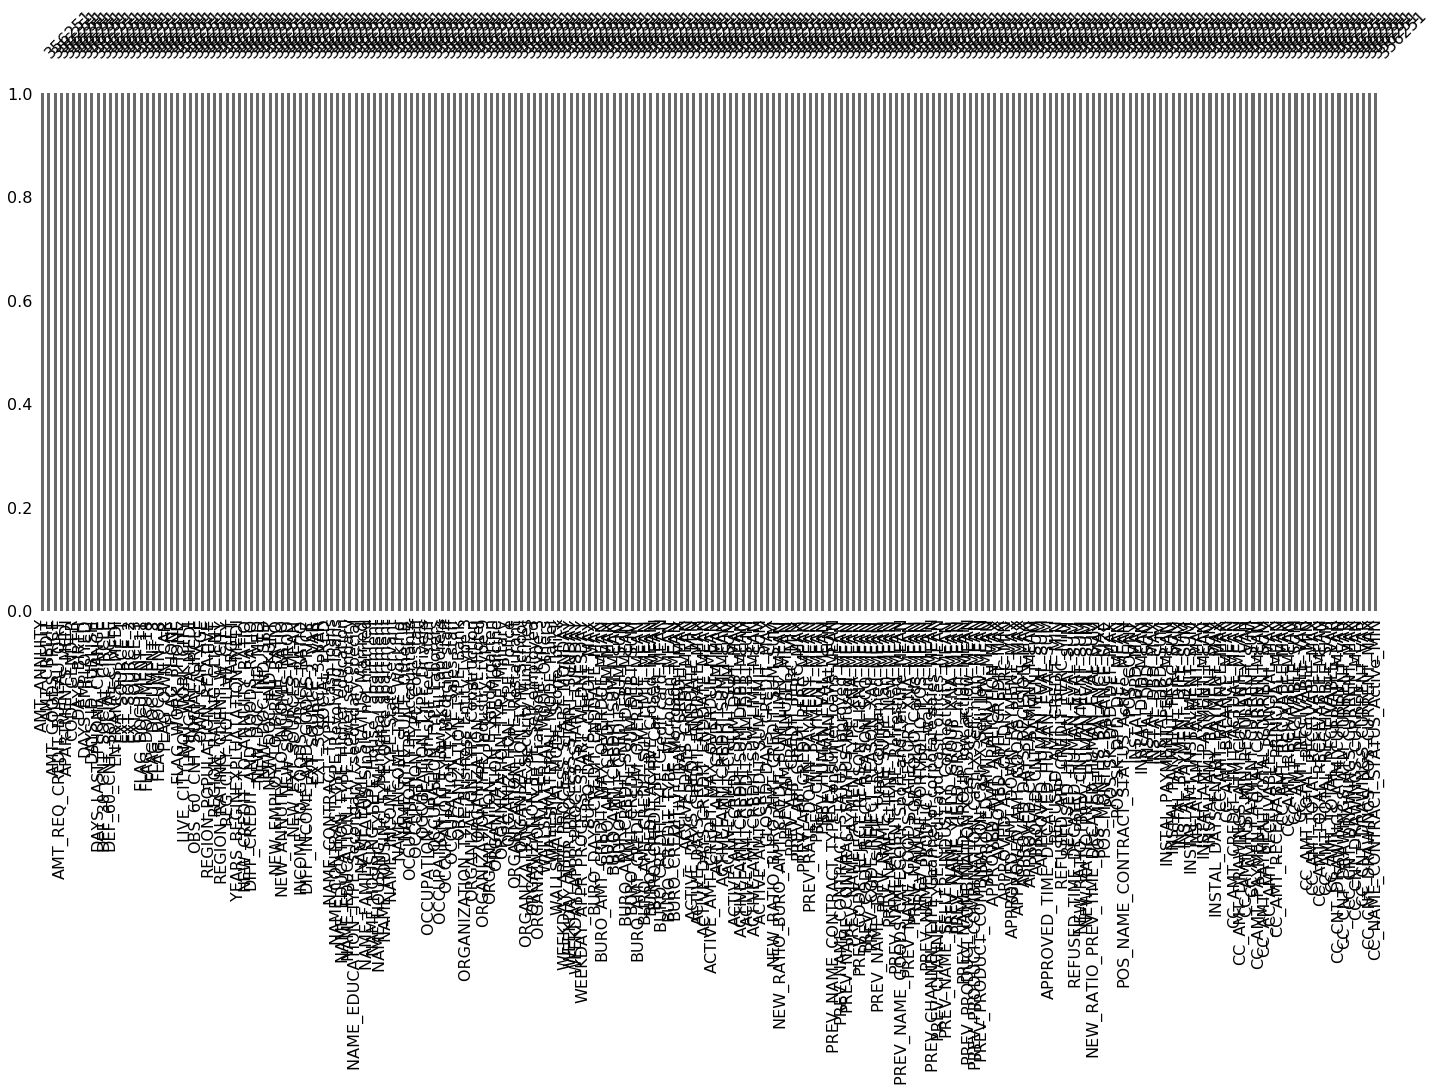

In [31]:
msno.bar(X_filled)

In [48]:
for i in range(5):
    print ( 10** (-i))

1
0.1
0.01
0.001
0.0001


In [43]:
10 ** (-1)

0.1

In [45]:
10 ** (-3)

0.001